# Aprendizaje supervisado (Clasificación)

En la presentación establecimos que los algoritmos de aprendizaje supervidado necesitan entrenarse con datos etiquetados, lo que significa que los datos de entrada deben de estar asociados con una etiqueta u objetivo correspondiente. El algoritmo de aprendizaje supervisado que elijamos tiene que aprender la relacion que existe entre las caracteristicas de su entrada y salida correspondientes.





## Componentes principales de aprendizaje supervisado:

### Caracteristicas de entrada (X):

Estas son las variables independientes, también llamadas características o predictores, que se utilizan como entrada para el modelo. Representan las características o atributos de las instancias de datos.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Datasets/Datos_curso/diabetes.csv')

df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Etiquetas u objetivo (y):

Estas son las variables dependientes, también llamadas etiquetas o salidas, que son los resultados deseados que el modelo intenta predecir en función de las características de entrada.

In [ ]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Datos de Entrenamiento:

 Es el conjunto de datos etiquetado utilizado para entrenar el modelo. Consiste en pares de características de entrada y sus correspondientes etiquetas objetivo.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size=0.2 significa que el 20% de los datos se utilizará para prueba, y el 80% para entrenamiento
# random_state se utiliza para garantizar la reproducibilidad de los resultados

# Mostrar las dimensiones de los conjuntos de datos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (614, 8)
Dimensiones de X_test: (154, 8)
Dimensiones de y_train: (614,)
Dimensiones de y_test: (154,)


En este ejemplo, tenemos un dataset con dos características (X) y las etiquetas objetivo correspondientes (y). Usamos train_test_split para dividir los datos en conjuntos de entrenamiento y prueba. El parámetro test_size está configurado en 0.2, lo que indica que el 20% de los datos se utilizará para prueba, mientras que el 80% restante se utilizará para entrenamiento. El parámetro random_state se establece en 42 para garantizar la reproducibilidad de los resultados.

Después de ejecutar este código, verás las dimensiones de los conjuntos de entrenamiento y prueba resultantes, que serán diferentes, ya que representan diferentes subconjuntos del dataset original.

**NOTA:**

 Si no especificas un valor para random_state, cada vez que ejecutes el código, se dividirá en conjuntos de entrenamiento y prueba de manera diferente. Esto puede afectar los resultados de evaluación del modelo, ya que los datos en los conjuntos de entrenamiento y prueba serán diferentes en cada ejecución.

Al establecer un valor fijo para random_state, como 42 (que puede ser cualquier número), aseguramos que, independientemente de cuántas veces ejecutemos el código, la división de los datos será la misma. Esto es útil cuando queremos obtener resultados consistentes y comparar diferentes modelos de manera justa.

En resumen, el uso del parámetro random_state nos brinda control sobre cómo se realiza la división de los datos y nos permite obtener resultados reproducibles, lo que es útil para el desarrollo y la evaluación de modelos de aprendizaje automático.

### Modelo (Función de Hipótesis):



 El modelo representa el algoritmo o función que mapea las características de entrada a las salidas predichas. En el Aprendizaje Supervisado, el objetivo es encontrar el mejor modelo que pueda predecir con precisión las etiquetas objetivo para nuevos datos no vistos.



**Valores de coheficiente W en modelos de clasificación**

En el contexto de modelos de clasificación, los valores "w" de los coeficientes generalmente se refieren a los pesos o coeficientes asignados a las características (también conocidas como predictores o variables independientes) en el modelo. Estos coeficientes juegan un papel crucial en el proceso de clasificación, ya que determinan la influencia de cada característica en la predicción del resultado (etiqueta de clase).

En la mayoría de los modelos de clasificación lineales, como la regresión logística y las máquinas de soporte vectorial (SVM), la relación entre las características y la clase predicha se representa de la siguiente manera:

Para un problema de clasificación binaria (dos clases, a menudo etiquetadas como 0 y 1):

In [ ]:
y = w0 + w1 * x1 + w2 * x2 + ... + wn * xn #Este es codigo ejemplo, no se corre

donde:

- ```y``` es el resultado predicho (probabilidad o puntaje).
- ```w0``` es el término de intercepción (término de sesgo).
- ```w1, w2, ..., wn``` son los coeficientes asociados con cada característica x1, x2, ..., xn.
- ```x1, x2, ..., xn``` son los valores de las características para una instancia de datos determinada.


Para problemas de clasificación con múltiples clases (más de dos clases), generalmente se utilizan estrategias uno-contra-todos o uno-contra-uno. En tales casos, el modelo puede tener varios conjuntos de coeficientes, uno para cada clase.

Los valores de los coeficientes se determinan durante la fase de entrenamiento del modelo. El proceso de entrenamiento tiene como objetivo encontrar los valores óptimos para los coeficientes que mejor se ajusten a los datos de entrenamiento y minimicen el error de predicción.

Los valores de los coeficientes proporcionan información sobre la importancia y la dirección (positiva o negativa) de cada característica en la determinación de la etiqueta de clase. Valores absolutos más grandes de los coeficientes indican influencias más fuertes, y el signo del coeficiente (+ o -) determina la dirección de esa influencia.

Es importante tener en cuenta que no todos los modelos de clasificación tienen coeficientes fácilmente interpretables. Por ejemplo, las redes neuronales pueden tener un gran número de capas ocultas y neuronas, lo que dificulta la interpretación de los pesos de las características individuales. Sin embargo, comprender los valores de los coeficientes puede proporcionar información valiosa sobre cómo el modelo realiza predicciones y puede ayudar en la selección de características y la depuración del modelo.

In [ ]:
X_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([0, 0, 1, 1, 1])

# Adding a bias term (x0 = 1) for the intercept
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train.reshape(-1, 1)]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the model using gradient descent
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    w = np.zeros(X.shape[1])
    for _ in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / y.size
        w -= learning_rate * gradient
    return w

weights = train_logistic_regression(X_train_bias, y_train)

print("Bias (w0):", weights[0])
print("Coefficient (w1):", weights[1])

Bias (w0): -1.1109228546979006
Coefficient (w1): 0.7216447172553668


In [ ]:
from sklearn.linear_model import LogisticRegression

# Reshape the X_train to a 2D array (required by sklearn)
X_train_reshaped = X_train.reshape(-1, 1)

model = LogisticRegression()
model.fit(X_train_reshaped, y_train)

sklearn_intercept = model.intercept_[0]
sklearn_coefficient = model.coef_[0][0]

print("Bias (w0):", sklearn_intercept)
print("Coefficient (w1):", sklearn_coefficient)


Bias (w0): -2.5337638504623134
Coefficient (w1): 1.0469643175544174


**NOTA:**

El término de intercepción w0 o sesgo es un parámetro importante en los modelos de aprendizaje automático. Permite ajustar el modelo para que se adapte mejor a los datos, mejora la generalización y evita restricciones innecesarias. En muchos casos, el sesgo es crucial para obtener un modelo más preciso y representativo de los datos del mundo real.

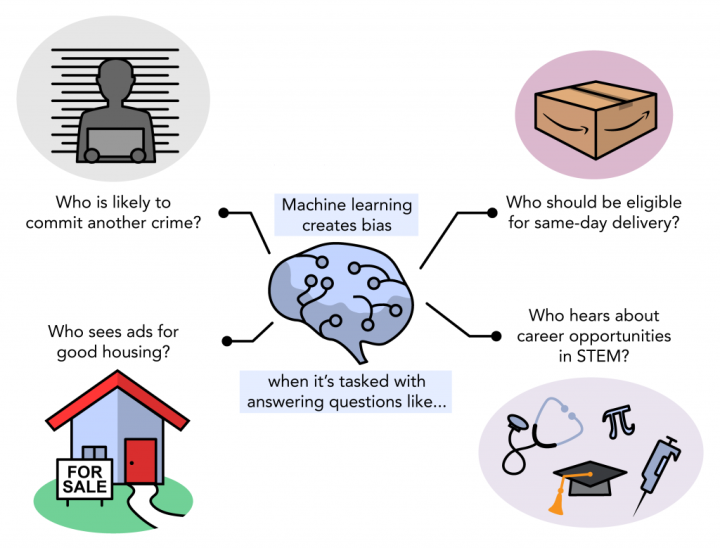

### Función de pérdida:

También conocida como función de costo u objetivo, cuantifica qué tan bien se está desempeñando el modelo. Mide la diferencia entre las salidas predichas y las etiquetas objetivo reales. El algoritmo de aprendizaje busca minimizar esta función de pérdida durante el entrenamiento.

- **Entropía Cruzada Binaria (Binary Cross Entropy):**

 Esta función de pérdida se utiliza en problemas de clasificación binaria. Mide la discrepancia entre las probabilidades predichas y las etiquetas binarias codificadas (0 o 1).



In [ ]:
import tensorflow as tf
from keras.losses import BinaryCrossentropy


- **Entropía Cruzada Categórica (Categorical Cross Entropy):**

 Se usa en problemas de clasificación con múltiples clases. Mide la discrepancia entre las probabilidades predichas y las etiquetas categóricas codificadas mediante one-hot encoding.



In [ ]:
import tensorflow as tf
from keras.losses import CategoricalCrossentropy


- **Entropía Cruzada Esparsa (Sparse Categorical Cross Entropy):**

 Similar a la entropía cruzada categórica, pero se utiliza cuando las etiquetas no están codificadas mediante one-hot encoding, sino como enteros.




In [ ]:
import tensorflow as tf
from keras.losses import SparseCategoricalCrossentropy


- **Error Hinge (Hinge Loss):** Es una función de pérdida utilizada en máquinas de soporte vectorial (SVM) para clasificación binaria y multi-clase. Ayuda a encontrar el margen máximo entre las clases.

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

- **Entropía Cruzada Focal (Focal Loss):** Esta función de pérdida se utiliza para tratar el desequilibrio de clases en problemas de clasificación. Penaliza más los errores en clases minoritarias para que el modelo se enfoque en clasificar mejor esas clases.



- **Índice de Gini (Gini Index):** Se usa principalmente en árboles de decisión y bosques aleatorios para medir la impureza de los nodos. Ayuda a encontrar la mejor división en los nodos del árbol para mejorar la clasificación.



# Practica 1:

Tomando en cuenta las bases de datos de la presentación, (en caso de tener un tema de interes, puede utilizarse otra base de datos que este designada para clasificación) se realizan los siguientes pasos:

- Importar los datos.
- Seleccionar características de entrada X.
- Establecer la (y) etiqueta de los datos.
- Dividir nuestra base de datos en entrenamiento y prueba.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Archivo/SVMtrain.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
X = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare']]
X.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,Male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,Male,35.0,0,0,8.0500


In [ ]:
y = df['Embarked']
y.head()

0    3
1    1
2    3
3    3
4    3
Name: Embarked, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size=0.2 significa que el 20% de los datos se utilizará para prueba, y el 80% para entrenamiento
# random_state se utiliza para garantizar la reproducibilidad de los resultados

# Mostrar las dimensiones de los conjuntos de datos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (711, 8)
Dimensiones de X_test: (178, 8)
Dimensiones de y_train: (711,)
Dimensiones de y_test: (178,)


### Metricas de evaluacion

Los problemas de clasificacion tienen una salida discreta, asi que necesitamos una metrica que nos ayude a comparar las clases del tipo discreta. Las metricas de evaluacion para clasificacion evaluan el rendimiento de un modelo diciendonos que tan malo o bueno es el resultado de la clasificacion. El tipo de metrica que elegimos depende del enfoque del problema.

Las metricas que utilizamos son:

- Exactitud (Accuracy)
- Matriz de confusion
- Precision y memoria (Precision, recall)
- Score F1
- AU-ROC

#### Exactitud (accuracy)

En la clasificacion, la exactitud es una de las metricas mas simples de implementar, y se define como el numero de predicciones correctas divididas por el total numero de predicciones, multiplicado todo por 100.

\begin{align}
       Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}

Esta metrica solo es bueno utilizarla cuando nuestra clase objetivo es balanceada. Cuando no es el caso, pasamos a las otras metricas.

#### Matriz de confusion

La matriz de confusion es una metrica en la cual podemos interpretar graficamente los resultados mencionados en la formula de arriba:

- TP: True positive o verdadero positivo

- TN: True negative o verdadero negativo

- FP: False positive o falso positivo

- FN: False negative o falso negativo.

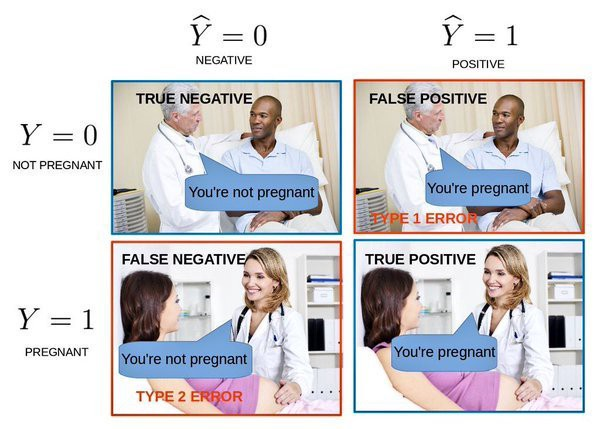

#### Precision

Esta metrica explica cuantas de las clases predecidas resultaron ser correctas. En este caso, la metrica de precision es buena cuando se tienen casos en los que los falsos positivos son de mayor importancia que los falsos negativos.

\begin{align}
       Precision = \frac{TP}{TP +FP}
\end{align}



#### Recall (memoria a sensibilidad)

Esta metrica nos dice cuantos verdaderos casos positivos pudo nuestro modelo predecir de manera correcta. Aqui nos conviene usar esta metrica cuando los falsos negativos con mas importantes que los falsos positivos.

\begin{align}
       Recall = \frac{TP}{TP +FN}
\end{align}




#### F1 score

Esta metrica combina las dos metricas anteriores para darnos un mejor balance (cuando ambos casos son importantes en tu problema)

\begin{align}
       F1 = 2 * \frac{Precision * Recall}{Precision + Recall}
\end{align}



#### AUC ROC

Del gráfico que se muestra a continuación, cuanto mayor sea el AUC, mejor será el rendimiento del modelo en diferentes puntos de umbral entre las clases positivas y negativas. Esto simplemente significa que cuando AUC es igual a 1, el clasificador puede distinguir perfectamente entre todos los puntos de clase Positivos y Negativos. Cuando AUC es igual a 0, el clasificador estaría prediciendo todos los Negativos como Positivos y viceversa. Cuando AUC es 0.5, el clasificador no puede distinguir entre las clases Positiva y Negativa.

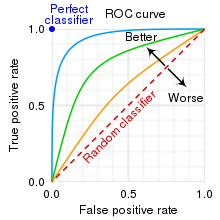

#### Log loss o logistic loss

Esta caracteristica la vemos mas cuando estamos modelando redes neuronales.

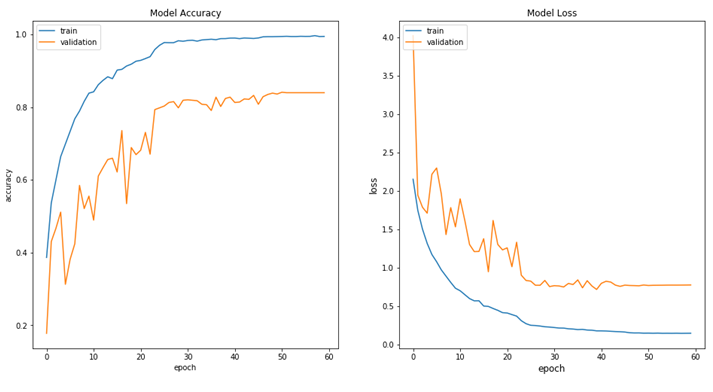

## Algoritmos comunes de clasificación

### Regresion logistica

La Regresión Logística es un método estadístico ampliamente utilizado para problemas de clasificación binaria, donde la variable objetivo (también conocida como variable dependiente o variable de respuesta) toma solo dos posibles resultados, generalmente representados como 0 y 1. A pesar de su nombre, la Regresión Logística es un algoritmo de clasificación, no un algoritmo de regresión.







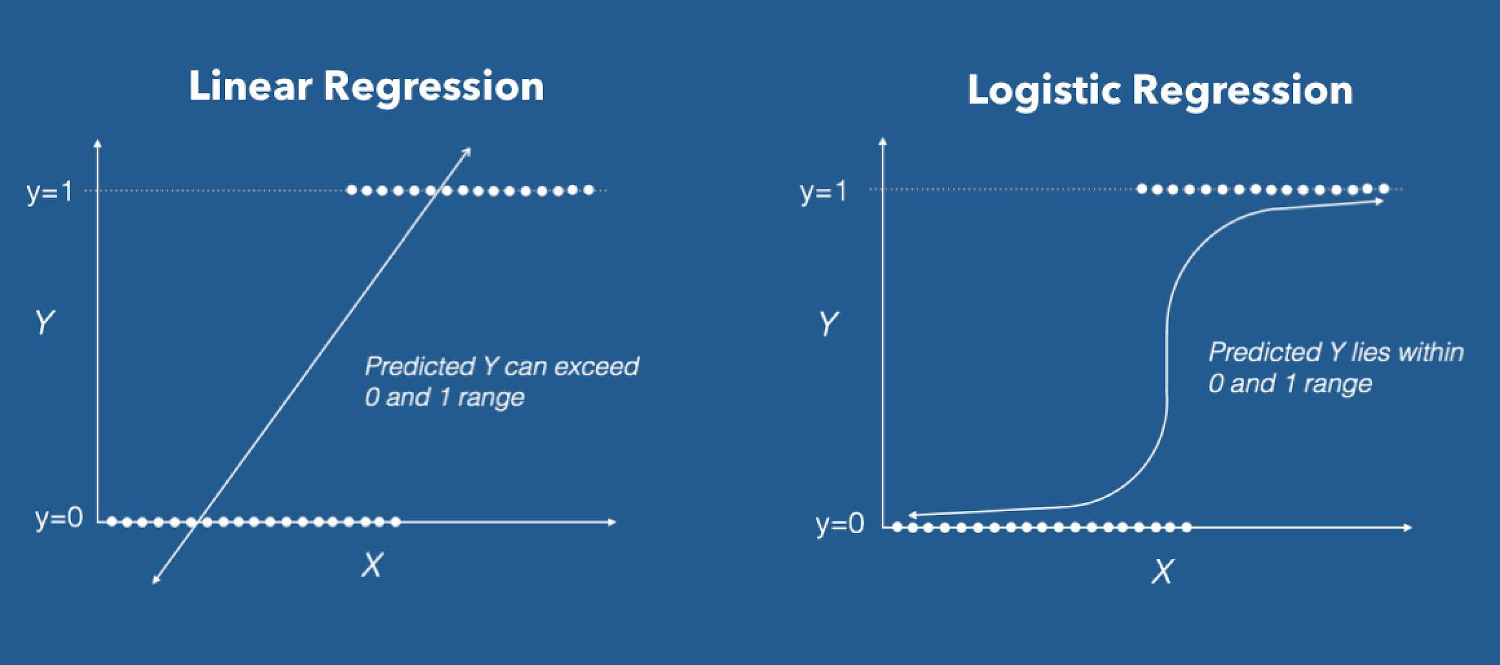

Durante la fase de entrenamiento de la Regresión Logística, los parámetros del modelo (pesos y sesgo) se aprenden a partir de los datos de entrenamiento etiquetados mediante técnicas de optimización, como el Descenso del Gradiente. El objetivo es encontrar los valores óptimos para los pesos y el sesgo que minimicen la diferencia entre las probabilidades predichas y las verdaderas etiquetas de clase.

La Regresión Logística es ampliamente utilizada debido a su simplicidad, interpretabilidad y eficiencia. Funciona bien cuando la relación entre las características de entrada y el logaritmo de las probabilidades de la variable objetivo es aproximadamente lineal. Sin embargo, puede no tener un buen rendimiento en problemas altamente complejos o no lineales, donde otros clasificadores más flexibles como las Máquinas de Soporte Vectorial (SVM) o las Redes Neuronales pueden ser más apropiados.




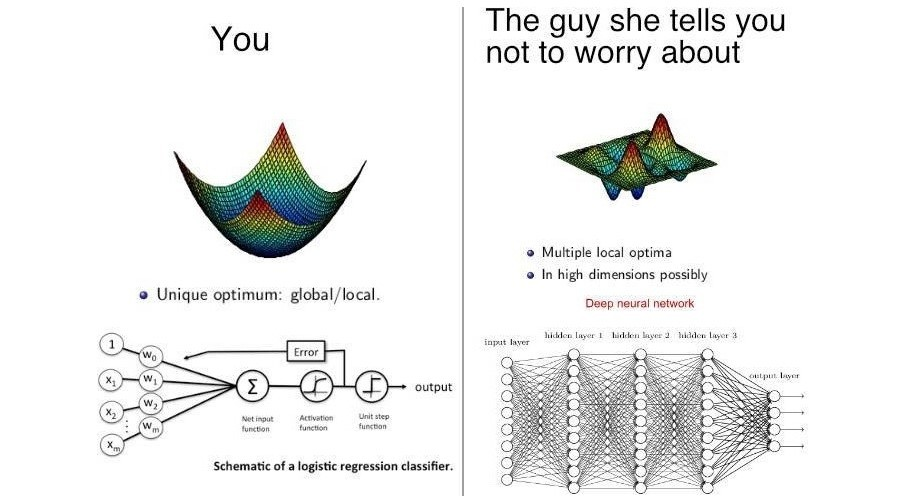

Es esencial preprocesar los datos de entrada y manejar adecuadamente los valores faltantes o los valores atípicos antes de aplicar la Regresión Logística. Además, se suele utilizar la escala de características (por ejemplo, estandarización) para asegurar que las características tengan una escala similar.

En resumen, la Regresión Logística es un algoritmo popular y poderoso para tareas de clasificación binaria, especialmente cuando la relación entre las características de entrada y la variable objetivo es aproximadamente lineal. Es adecuado para casos donde se valora la interpretabilidad y la simplicidad, y sirve como un buen modelo de referencia para muchos problemas de clasificación.

In [ ]:
import pandas as pd

pima = pd.read_csv("/content/drive/MyDrive/Datasets/Datos_curso/diabetes.csv")

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

Text(0.5, 384.16, 'Predicted label')

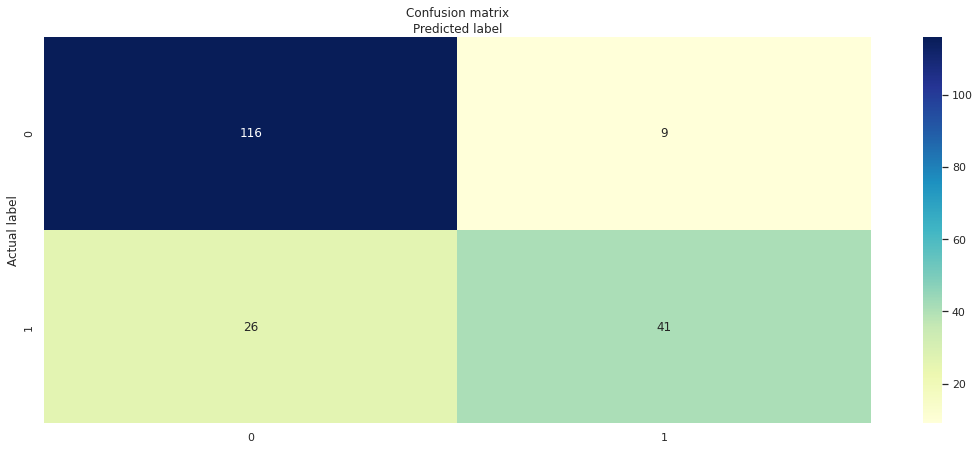

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



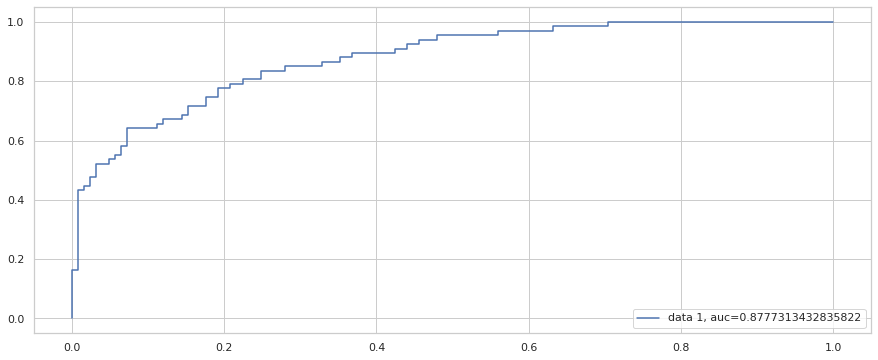

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Suposiciones del modelo de regresión logística

- **Independencia de las observaciones:**

 La Regresión Logística asume que las observaciones en el conjunto de datos son independientes entre sí. Cada punto de datos debe ser independiente de los demás. Si hay una dependencia entre las observaciones (por ejemplo, datos de series temporales), la Regresión Logística tradicional puede no ser apropiada.

- **Ausencia de multicolinealidad:**

 La Regresión Logística asume que las variables independientes (características) no están altamente correlacionadas entre sí. La multicolinealidad puede dificultar la interpretación de los efectos individuales de las características en la variable objetivo y puede dar lugar a estimaciones inestables de los coeficientes.

- **Suficiente cantidad de datos:**

 La Regresión Logística funciona bien con una cantidad suficiente de datos. A medida que aumenta el número de observaciones, las estimaciones del modelo se vuelven más estables y confiables. Tener muy pocos puntos de datos puede llevar al sobreajuste y a resultados poco confiables.

- **Variable objetivo binaria o categórica:**

 La Regresión Logística está diseñada para problemas de clasificación binaria donde la variable objetivo tiene solo dos resultados posibles (por ejemplo, 0 y 1). Se puede extender para manejar clasificación multiclase utilizando técnicas como uno contra el resto o regresión softmax.

- **Poca o ninguna endogeneidad:** La endogeneidad ocurre cuando las variables independientes están correlacionadas con el término de error, lo que conduce a estimaciones sesgadas de los coeficientes. La Regresión Logística asume poca o ninguna endogeneidad para obtener resultados precisos.


- **Características correctamente escaladas:**

 El escalado de características no es estrictamente necesario para la Regresión Logística, pero puede ayudar a mejorar la velocidad de convergencia y el rendimiento del modelo, especialmente si las características tienen escalas muy diferentes.


Es esencial validar estas suposiciones antes de aplicar la Regresión Logística a un conjunto de datos. La exploración de datos, visualización y técnicas de diagnóstico pueden ayudar a identificar violaciones de estas suposiciones y guiar cualquier paso de preprocesamiento necesario para mejorar el rendimiento del modelo. Además, si algunas de las suposiciones no se cumplen, puede ser más apropiado utilizar técnicas de modelado alternativas, como clasificadores no lineales, para los datos específicos en cuestión.

### Clasificador Naive bayes

Es un algoritmo de clasificación basado en el teorema de Bayes que da una suposición de independencia entre los predictores. En términos simples, un clasificador Naive Bayes asume que la presencia de una característica particular en una clase no está relacionada con la presencia de ninguna otra característica.

Incluso si las características dependen unas de otras, todas estas propiedades contribuyen a la probabilidad de forma independiente. El modelo Naive Bayes es fácil de hacer y es particularmente útil para conjuntos de datos comparativamente grandes. Incluso con un enfoque simplista, se sabe que Naive Bayes supera a la mayoría de los métodos de clasificación en el aprendizaje automático.


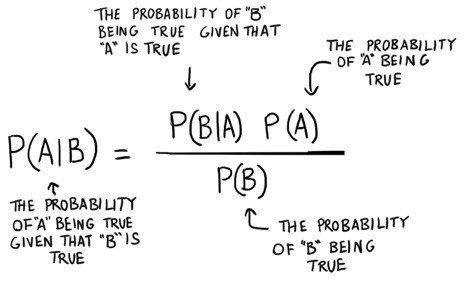

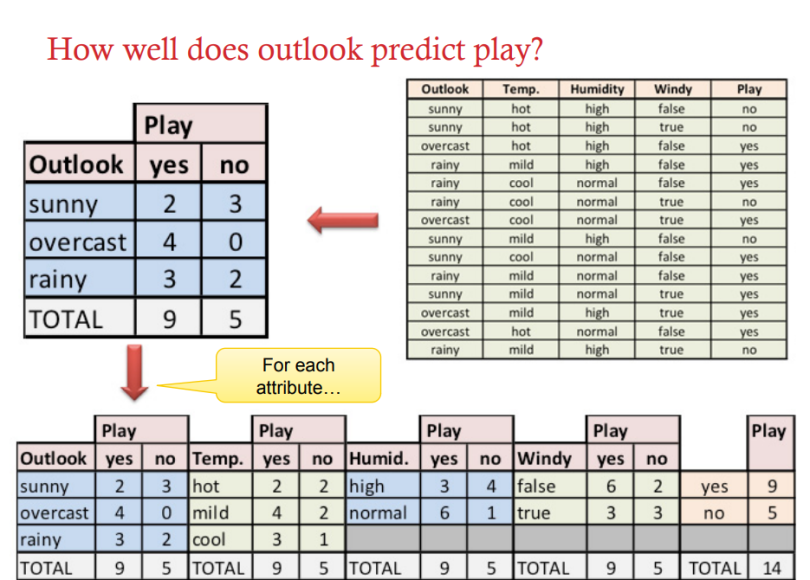

In [ ]:
from sklearn.naive_bayes import GaussianNB

#### Suposiciones del modelo de Naive Bayes


- **Independencia de Características:**

 La suposición más significativa en Naive Bayes es que todas las características son condicionalmente independientes dadas las etiquetas de clase. Esto significa que la presencia o ausencia de una característica no afecta la presencia o ausencia de ninguna otra característica. Aunque esta suposición rara vez es cierta en conjuntos de datos del mundo real, Naive Bayes puede funcionar bien incluso cuando la suposición de independencia se viola en cierta medida.

- **Conjunto de Características Fijo y Conocido:**

 Naive Bayes asume que las características utilizadas para la clasificación son fijas y conocidas de antemano. Las nuevas características que no se han visto durante el entrenamiento no se consideran en el proceso de clasificación.

- **Suficiente Cantidad de Datos para Estimación:**

 Naive Bayes requiere una cantidad suficiente de datos de entrenamiento para estimar con precisión las probabilidades de las diferentes características dadas las etiquetas de clase. Con datos limitados, las estimaciones pueden ser poco confiables.

- **Representación de Datos:**

 Naive Bayes asume que las características están representadas de forma independiente y que el orden o la estructura de los valores de las características no importa.

- **Valores de Características No Negativos:**

 Naive Bayes asume que los valores de las características son no negativos, ya que las probabilidades no pueden ser negativas.

- **Manejo de Probabilidades Cero:**

 Cuando un valor de característica en los datos de prueba no ha sido visto en los datos de entrenamiento para una clase específica, el algoritmo puede asignar una probabilidad cero. Para manejar esta situación, se utilizan técnicas como el suavizado de Laplace (suavizado aditivo) para evitar probabilidades cero.

A pesar de estas suposiciones, Naive Bayes puede ser sorprendentemente efectivo en muchas tareas de clasificación del mundo real, especialmente cuando el conjunto de datos es grande, las características son en su mayoría independientes y hay suficientes datos para una estimación precisa. Es particularmente útil para tareas de clasificación de texto, como la detección de spam y el análisis de sentimientos, donde la suposición de independencia puede cumplirse razonablemente bien.

Es importante evaluar los datos y considerar las implicaciones de estas suposiciones antes de usar Naive Bayes. En casos donde la suposición de independencia se viola gravemente o donde pueden surgir nuevas características durante las pruebas, otros algoritmos de clasificación más flexibles, como la regresión logística o los árboles de decisión, pueden ser más adecuados.

### K-nearest neighbor

Es un algoritmo de aprendizaje perezoso que almacena todas las instancias correspondientes a los datos de entrenamiento en un espacio n-dimensional. Es un algoritmo de aprendizaje perezoso ya que no se enfoca en construir un modelo interno general, sino que funciona en el almacenamiento de instancias de datos de entrenamiento.

La clasificación se calcula a partir de un voto de mayoría simple de los k vecinos más cercanos de cada punto. Está supervisado y toma un montón de puntos etiquetados y los usa para etiquetar otros puntos. Para etiquetar un nuevo punto, mira los puntos etiquetados más cercanos a ese nuevo punto, también conocidos como sus vecinos más cercanos. Tiene el voto de esos vecinos, por lo que cualquier etiqueta que tenga la mayoría de los vecinos es la etiqueta para el nuevo punto. La “k” es el número de vecinos que comprueba.



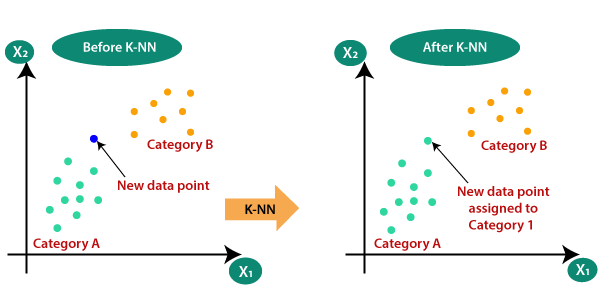

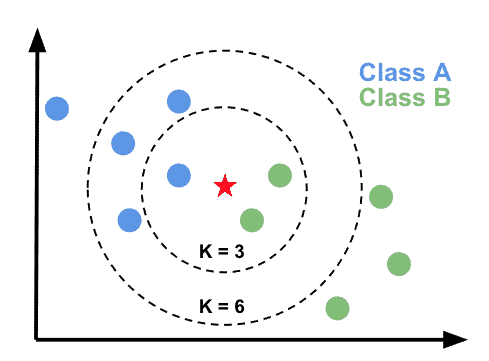

#### Suposiciones del modelo K-NN

- **Espacio Métrico:**

 K-NN asume que los datos se encuentran en un espacio métrico, donde el concepto de distancia entre puntos está bien definido. La elección de la métrica de distancia (por ejemplo, distancia euclidiana, distancia de Manhattan, etc.) puede tener un impacto significativo en el rendimiento de K-NN.

- **Suavidad Local:**

 K-NN asume que los puntos cercanos entre sí en el espacio de características tienden a tener etiquetas de clase similares. Esta suposición se basa en la noción de que los puntos de datos de la misma clase tienen más probabilidades de agruparse juntos en el espacio de características.

- **Datos Ruidosos y Valores Atípicos:**

 K-NN puede ser sensible a datos ruidosos y valores atípicos, ya que considera todo el vecindario de un punto de datos para la clasificación. Los puntos de datos ruidosos que están mal etiquetados o los valores atípicos que no pertenecen a ninguna clase en particular pueden afectar la precisión de K-NN.

- **Representación de Datos:**

 K-NN asume que los datos están representados en un espacio de características significativo y apropiado. La elección de características relevantes que capturen los patrones subyacentes en los datos es fundamental para el rendimiento del algoritmo.

- **Densidad de Datos:**

 El rendimiento de K-NN puede verse afectado por la densidad de los puntos de datos en el espacio de características. En regiones con alta densidad de datos, el algoritmo puede realizar predicciones más precisas, mientras que en regiones con baja densidad de datos, las predicciones pueden ser menos confiables.

- **Elección de K:**

 El valor de K, es decir, el número de vecinos más cercanos a considerar, es un parámetro importante en K-NN. Diferentes valores de K pueden llevar a diferentes resultados de clasificación y la elección de K puede afectar la sensibilidad del algoritmo al ruido y al sobreajuste.

- **Escalado de Características:**

 K-NN puede ser sensible a la escala de las características, especialmente cuando la métrica de distancia utilizada es sensible a las diferencias de escala (por ejemplo, distancia euclidiana). Técnicas de escalado de características como la normalización o la estandarización pueden ser necesarias para asegurar que todas las características tengan una importancia similar en los cálculos de distancia.

K-NN es un algoritmo versátil y sencillo que puede funcionar bien en ciertos escenarios, especialmente cuando la distribución de datos subyacente es compleja o no se conoce explícitamente. Sin embargo, es fundamental comprender las características de los datos y realizar elecciones apropiadas para las métricas de distancia, el valor de K y el escalado de características para obtener los mejores resultados con K-NN. Además, la complejidad computacional de K-NN puede ser alta para conjuntos de datos grandes y es posible que no funcione bien en espacios de alta dimensionalidad debido a la "maldición de la dimensionalidad".

### Arbol de decision:

El algoritmo del árbol de decisión construye el modelo de clasificación en forma de estructura de árbol. Utiliza las reglas si-entonces que son igualmente exhaustivas y mutuamente excluyentes en la clasificación. El proceso continúa con el desglose de los datos en estructuras más pequeñas y, finalmente, la asociación con un árbol de decisión incremental. La estructura final parece un árbol con nudos y hojas. Las reglas se aprenden secuencialmente utilizando los datos de entrenamiento de uno en uno. Cada vez que se aprende una regla, se eliminan las tuplas que cubren las reglas. El proceso continúa en el conjunto de entrenamiento hasta que se alcanza el punto de terminación.

El árbol está construido en un enfoque recursivo de división y conquista de arriba hacia abajo. Un nodo de decisión tendrá dos o más ramas y una hoja representa una clasificación o decisión. El nodo superior en el árbol de decisión que corresponde al mejor predictor se denomina nodo raíz, y lo mejor de un árbol de decisión es que puede manejar datos categóricos y numéricos.



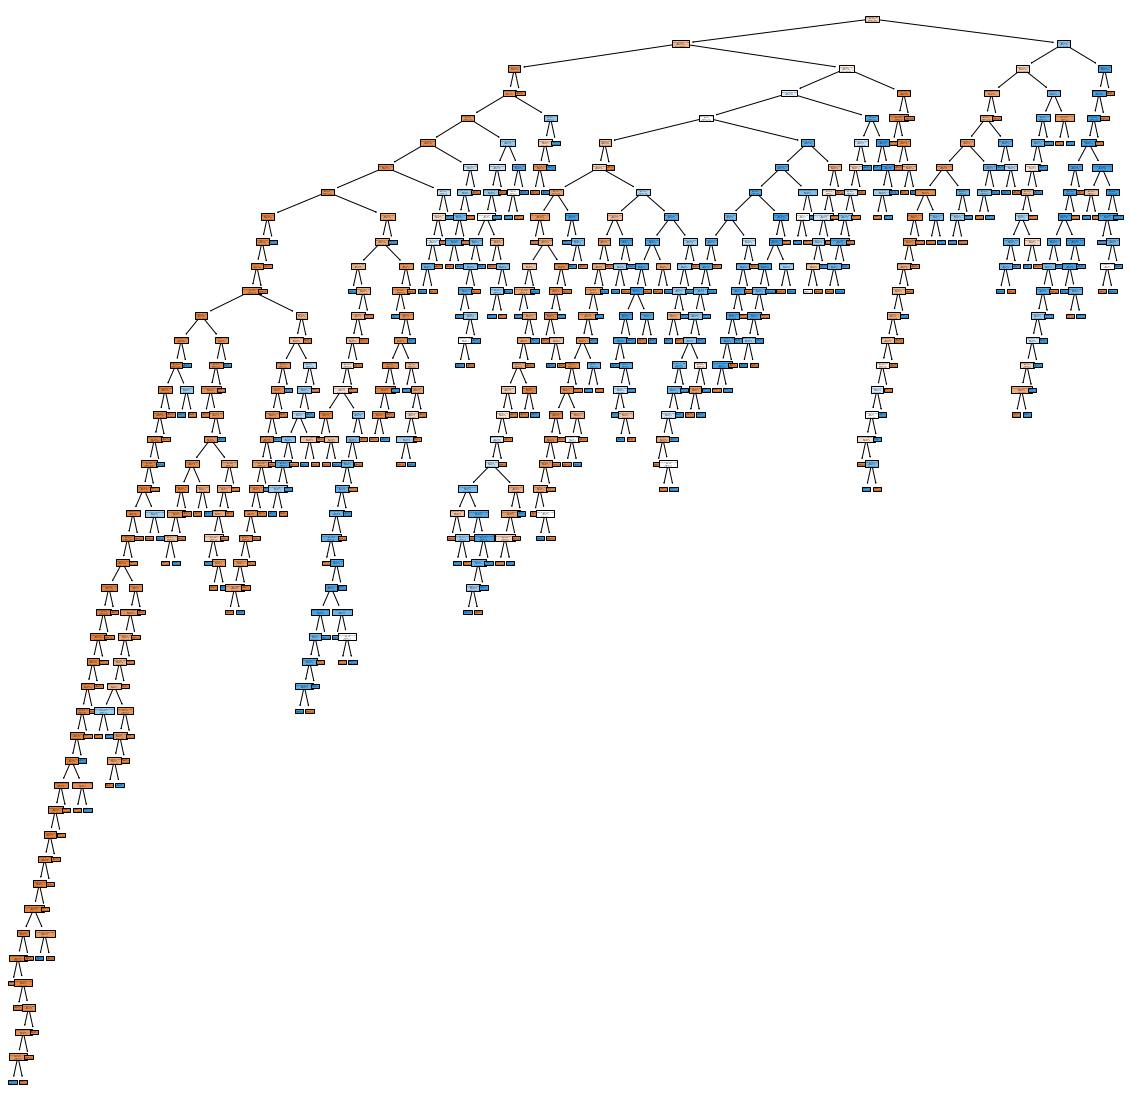

#### Suposiciones del modelo Arbol de decisión

- **División Binaria:**

 Los árboles de decisión asumen que los datos se pueden dividir en particiones binarias en cada nodo. En otras palabras, cada nodo de decisión en el árbol toma una decisión binaria (sí/no) basada en una característica específica y un valor umbral.

- **Particionado Binario Recursivo:**

 Los árboles de decisión utilizan un enfoque recursivo para dividir los datos en subconjuntos basados en los valores de diferentes características. Este proceso continúa hasta que se cumple un criterio de detención (por ejemplo, profundidad máxima del árbol, número mínimo de muestras por hoja, etc.).


- **Estructura Jerárquica:**

 Los árboles de decisión crean una estructura jerárquica dividiendo recursivamente los datos en subconjuntos. El nodo raíz representa todo el conjunto de datos, y cada nivel subsiguiente representa un subconjunto de datos basado en la división anterior.

- **Características Predictivas:**

 Los árboles de decisión asumen que algunas características son más predictivas de la variable objetivo que otras. El algoritmo intenta encontrar las características más informativas para dividir los datos y hacer predicciones basadas en ellas.

- **No-Linealidad:**

 Los árboles de decisión pueden modelar relaciones no lineales entre características y la variable objetivo de manera efectiva. A diferencia de los modelos lineales, no se limitan a capturar patrones lineales en los datos.

- **Escalado de Características:**

 Los árboles de decisión no son sensibles al escalado de características, ya que el proceso de división se basa en la comparación de los valores de las características mediante umbrales. Por lo tanto, no es necesario escalar las características antes de entrenar un árbol de decisión.

- **Manejo de Valores Faltantes:**

 Los árboles de decisión pueden manejar valores faltantes en los datos sin necesidad de técnicas de imputación. Crean ramas separadas para los valores faltantes y hacen predicciones basadas en las características disponibles.

- **Sobreajuste:**

 Los árboles de decisión pueden sobreajustar fácilmente los datos de entrenamiento, especialmente cuando el árbol es profundo y el modelo se vuelve demasiado complejo. Por lo tanto, es crucial usar técnicas de poda o establecer restricciones en la profundidad del árbol o el número mínimo de muestras por hoja para evitar el sobreajuste.

- **Características Categóricas y Numéricas:**

 Los árboles de decisión pueden manejar tanto características categóricas como numéricas de manera natural, lo que los hace versátiles para una amplia gama de tipos de datos.

En general, los árboles de decisión son flexibles y capaces de capturar relaciones complejas en los datos. Sin embargo, pueden ser sensibles a cambios pequeños en los datos y pueden generar árboles inestables en algunos casos. A menudo se utilizan métodos de conjunto como Random Forests y Gradient Boosting para mejorar el rendimiento y la robustez de los árboles de decisión.

### Random forest

Los árboles de decisión aleatorios o los bosques aleatorios son un método de aprendizaje conjunto para clasificación, regresión, etc. Funciona mediante la construcción de una multitud de árboles de decisión en el momento del entrenamiento y genera la clase que es el modo de las clases o clasificación o predicción media (regresión) de los árboles individuales.

Un bosque aleatorio es un metaestimador que ajusta una cantidad de árboles en varias submuestras de conjuntos de datos y luego usa un promedio para mejorar la precisión en la naturaleza predictiva del modelo. El tamaño de la submuestra siempre es el mismo que el del tamaño de entrada original, pero las muestras a menudo se extraen con reemplazos.



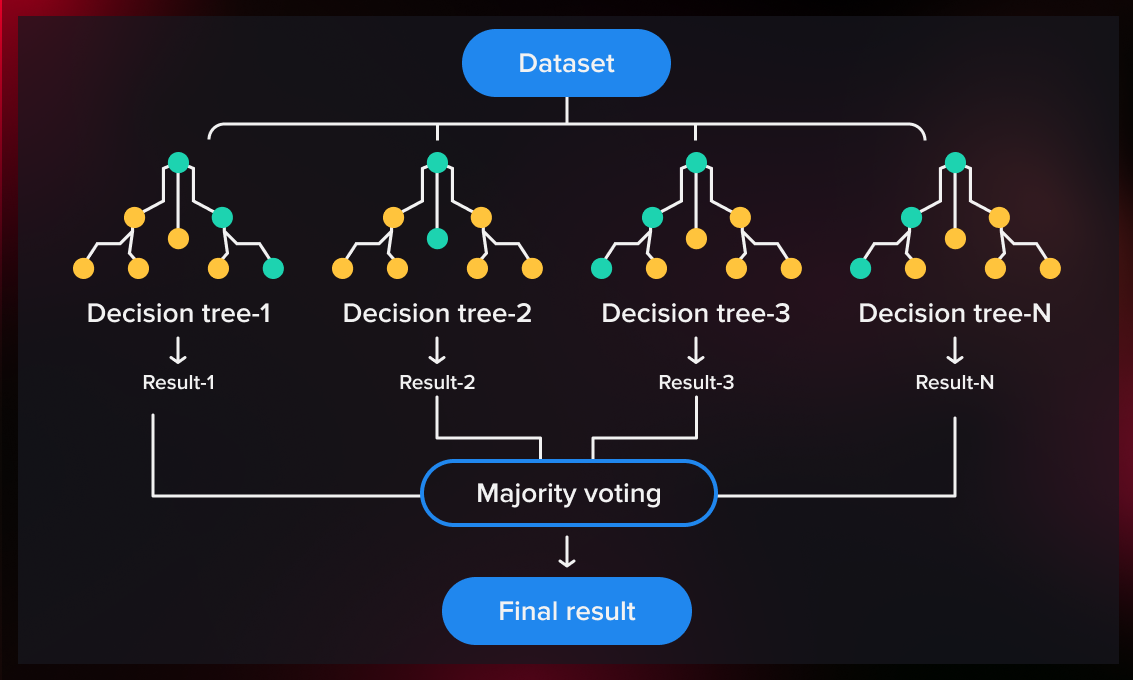

#### Suposiciones del modelo Arboles aleatorios

- **Independencia de los Árboles:**

 Random Forest asume que los árboles de decisión individuales en el ensamble se construyen de manera independiente. Cada árbol se construye sobre una muestra bootstrap (muestreo aleatorio con reemplazo) de los datos originales. Además, en cada división del árbol, solo se considera un subconjunto aleatorio de características para la mejor división. Estas técnicas de aleatorización promueven la diversidad entre los árboles, reduciendo el riesgo de sobreajuste y mejorando la generalización del modelo.

- **Relaciones No Lineales:**

 Al igual que los árboles de decisión, Random Forest puede manejar relaciones no lineales entre las características y la variable objetivo. La naturaleza de ensamble de Random Forest mejora aún más su capacidad para capturar patrones no lineales complejos en los datos.

- **Datos Ruidosos y Valores Atípicos:**

 Random Forest es robusto ante datos ruidosos y valores atípicos debido a la utilización de múltiples árboles. Los valores atípicos y los puntos de datos ruidosos tienen menos probabilidades de impactar significativamente la predicción final, ya que es probable que sean ignorados o ponderados menos en algunos de los árboles.

- **Conjuntos de Datos Grandes:**

 Random Forest puede manejar eficientemente conjuntos de datos grandes debido a su naturaleza paralela. El proceso de entrenar árboles individuales se puede paralelizar fácilmente, lo que lo convierte en una opción adecuada para aplicaciones con big data.

- **Escalado de Características:**

 Random Forest es insensible al escalado de características, ya que los árboles de decisión no se basan en cálculos basados en distancias. Por lo tanto, no es necesario escalar las características antes de entrenar un Random Forest.

- **Manejo de Valores Faltantes:**

 Random Forest puede manejar valores faltantes sin requerir imputación. Cuando un punto de datos contiene valores faltantes para una característica específica, el algoritmo aún puede realizar predicciones basadas en las características disponibles.

- **Promedio del Ensamble:**

 Random Forest se basa en el promedio del ensamble para realizar predicciones. La predicción final se obtiene agregando las predicciones de los árboles individuales. Este promedio ayuda a reducir el sobreajuste y mejora la precisión y robustez del modelo.

En general, Random Forest es un algoritmo poderoso y versátil que puede funcionar bien en una variedad de escenarios. Es adecuado para tareas de clasificación y regresión complejas, y su capacidad para manejar datos ruidosos, relaciones no lineales y conjuntos de datos grandes lo convierte en una opción popular en aplicaciones de aprendizaje automático.

### Maquina de soporte vectorial

La máquina de vectores de soporte es un clasificador que representa los datos de entrenamiento como puntos en el espacio separados en categorías por un espacio lo más amplio posible. Luego se agregan nuevos puntos al espacio prediciendo en qué categoría caen y a qué espacio pertenecerán.



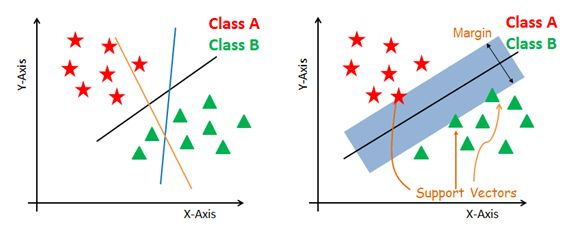

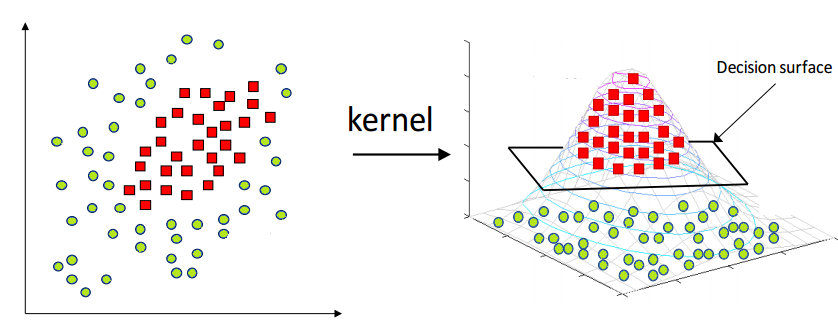

#### Suposiciones del modelo SVM

- **Separabilidad Lineal (para SVM Lineal):**

 La principal suposición del SVM Lineal es que los puntos de datos pueden ser separados en sus respectivas clases por un hiperplano lineal. Si los datos no son linealmente separables, es posible que el algoritmo no funcione adecuadamente a menos que se utilicen trucos de kernel o transformaciones no lineales.

- **Espacio de Características:**

 El SVM opera en un espacio de características, y su eficacia depende de la selección de características adecuadas que puedan distinguir entre las diferentes clases. Elegir características relevantes e informativas es fundamental para el rendimiento del SVM.

- **Conjunto de Datos Pequeño:**

 El SVM tiende a funcionar bien con conjuntos de datos pequeños o de tamaño moderado. En conjuntos de datos grandes, la complejidad computacional del SVM puede convertirse en un desafío.

- **Escalado de Datos:**

 El SVM es sensible a la escala de las características. Es importante escalar las características de manera adecuada, especialmente cuando se utilizan kernels basados en distancias, para evitar que ciertas características dominen el proceso de optimización.

- **Selección de Kernel (para SVM No Lineal):**

 En casos donde los datos no son linealmente separables, el SVM No Lineal utiliza funciones de kernel para transformar los datos a un espacio de mayor dimensión, donde podría existir un hiperplano separador. La elección del kernel adecuado y sus parámetros puede tener un impacto significativo en el rendimiento del modelo.

- **Requisitos Limitados de Memoria (SVM Lineal):**

 El SVM Lineal suele ser preferido para conjuntos de datos a gran escala debido a sus requisitos de memoria relativamente bajos en comparación con el SVM No Lineal con transformaciones de kernel.

- **Datos Ruidosos:**

 El SVM puede ser sensible a datos ruidosos, especialmente cuando los puntos de datos están mal etiquetados o etiquetados incorrectamente. Limpiar y preprocesar los datos para reducir el ruido es esencial para la eficacia del SVM.

- **Clasificación Binaria (para SVM Lineal):**

 Por defecto, el SVM Lineal está diseñado para problemas de clasificación binaria (dos clases). Para la clasificación multiclase, se pueden emplear técnicas como Uno contra Uno (One-vs-One) o Uno contra Todos (One-vs-All).

- **Interpretación Limitada (para SVM No Lineal):**

 El SVM No Lineal con kernels complejos puede llevar a modelos con una interpretación limitada. La interpretación de las relaciones entre las características y la variable objetivo puede ser más desafiante en tales casos.

En general, el SVM es un algoritmo versátil que puede manejar tanto tareas de clasificación lineal como no lineal. Sin embargo, es importante tener en cuenta las características de los datos y seleccionar kernels o transformaciones apropiadas para lograr resultados óptimos. Además, la elección de los parámetros de regularización y del kernel puede requerir ajuste para evitar el sobreajuste o el subajuste.

### Redes neuronales

Una red neuronal consta de neuronas que están dispuestas en capas, toman algún vector de entrada y lo convierten en una salida. El proceso involucra que cada neurona tome la entrada y aplique una función que a menudo es una función no lineal y luego pasa la salida a la siguiente capa.

En general, se supone que la red es de retroalimentación, lo que significa que la unidad o neurona alimenta la salida a la siguiente capa, pero no hay participación de ninguna retroalimentación en la capa anterior.

Se aplican ponderaciones a las señales que pasan de una capa a otra, y estas son las ponderaciones que se sintonizan en la fase de entrenamiento para adaptar una red neuronal para cualquier problema planteado.



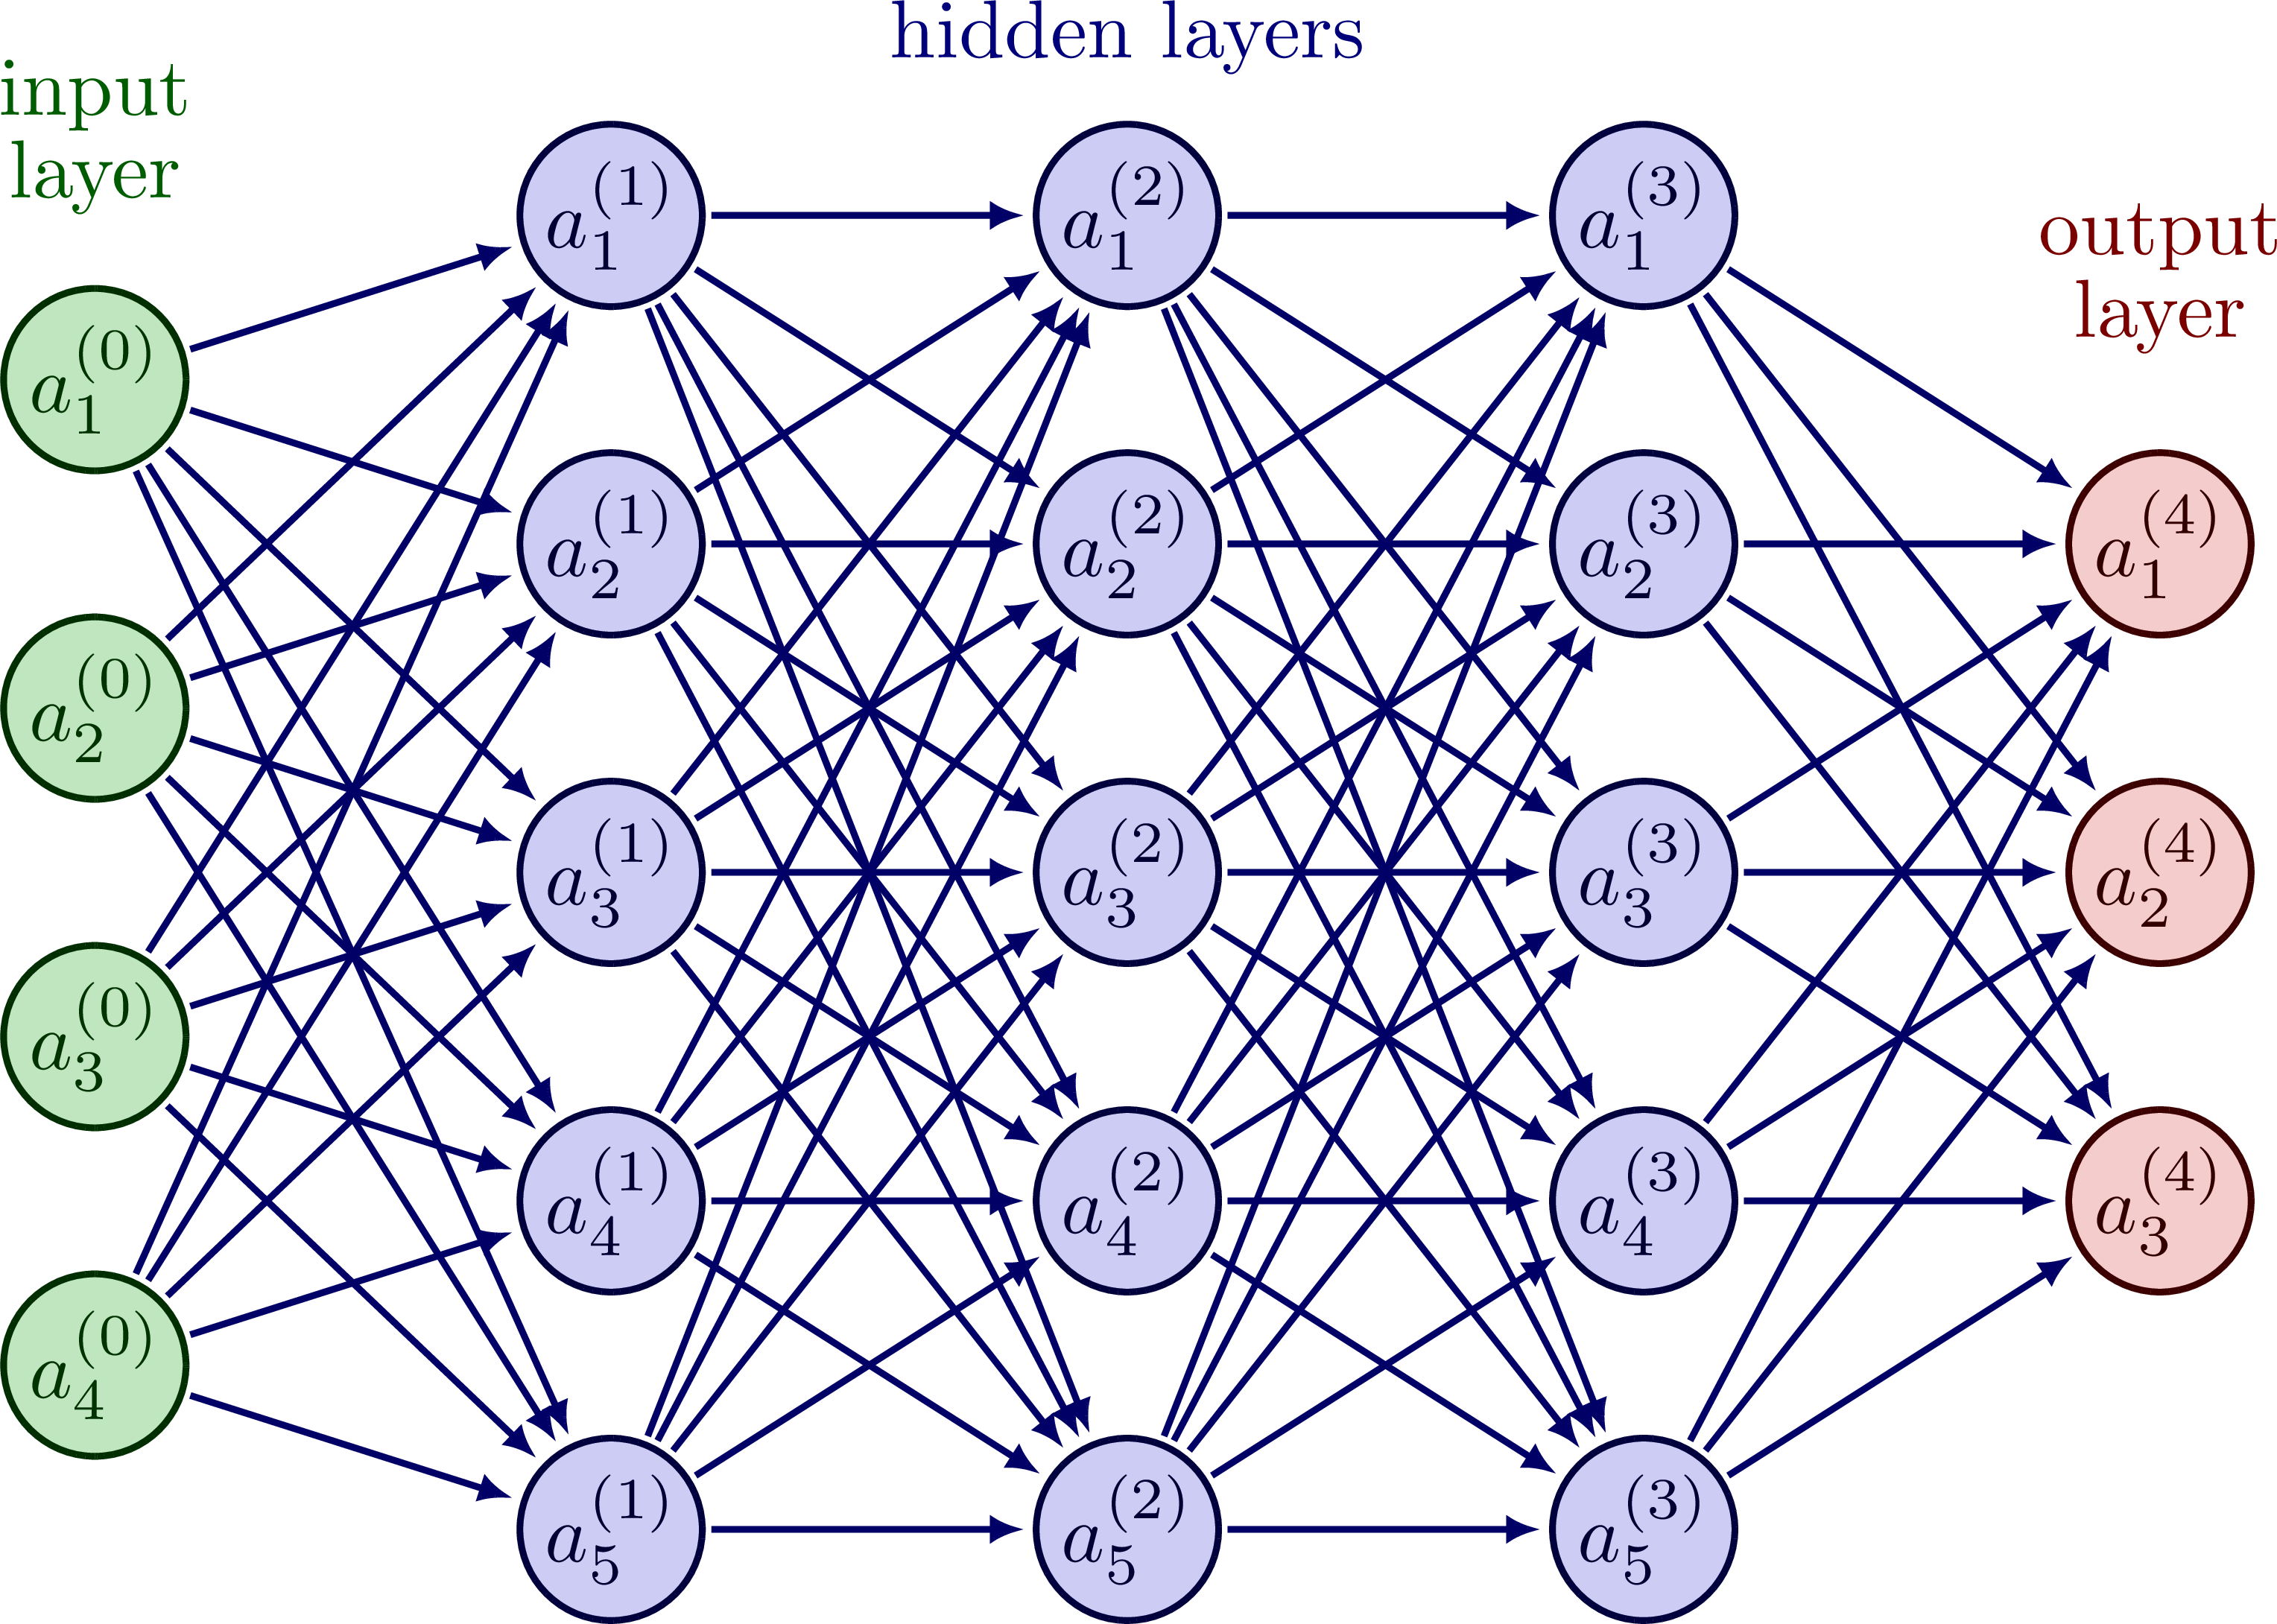

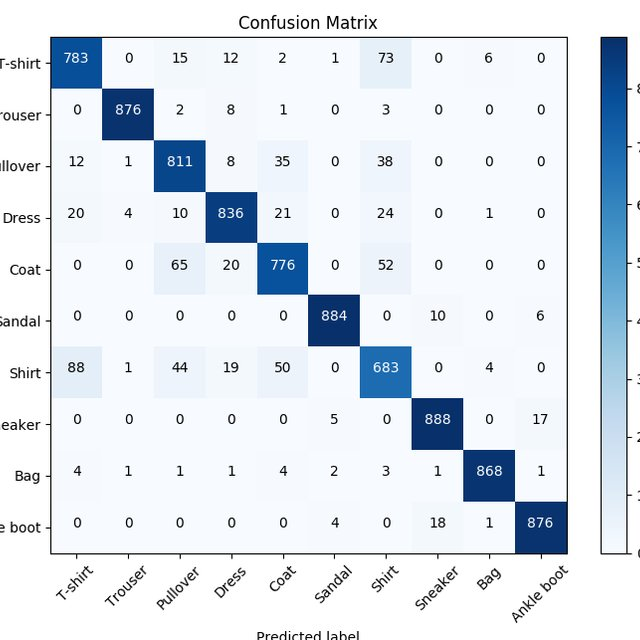

#### Suposiciones de modelos de redes neuronales

- **Datos Representativos:**

 Las redes neuronales asumen que los datos de entrenamiento son representativos de la distribución subyacente del problema. Contar con un conjunto de datos diverso y equilibrado ayuda al modelo a generalizar bien a datos no vistos.

- **Escalado de Características:**

 Aunque las redes neuronales pueden funcionar sin escalado de características, a menudo es beneficioso escalar las características de entrada. La normalización o estandarización de las características puede mejorar la velocidad de convergencia y la estabilidad del proceso de entrenamiento.

- **Preprocesamiento de Datos Apropiado:**

 El preprocesamiento de datos es crucial para las redes neuronales. Tratar con datos faltantes, manejar valores atípicos y codificar correctamente las variables categóricas son pasos esenciales para garantizar un rendimiento óptimo del modelo.

- **Suficiente Cantidad de Datos de Entrenamiento:**

 Las redes neuronales requieren una cantidad suficiente de datos de entrenamiento para aprender patrones significativos. En algunos casos, conjuntos de datos muy pequeños pueden provocar sobreajuste, y recolectar más datos o utilizar técnicas de aumento de datos puede ayudar a abordar este problema.

- **Selección de la Arquitectura del Modelo:**

 Elegir una arquitectura de red neuronal adecuada es importante. El número de capas, el número de neuronas por capa y las funciones de activación deben ser cuidadosamente considerados en función de la complejidad del problema y los datos disponibles.

- **Evitar el Sobreajuste:**

 Las redes neuronales pueden sobreajustar fácilmente los datos de entrenamiento, especialmente cuando el modelo es demasiado complejo en comparación con los datos disponibles. Técnicas de regularización como "dropout", regularización L1/L2 y detención temprana ("early stopping") se utilizan comúnmente para mitigar el sobreajuste.

- **Elección de la Función de Activación Adecuada:**

 Seleccionar funciones de activación adecuadas para las capas ocultas y la capa de salida es crucial. La elección de la función de activación puede afectar la capacidad del modelo para aproximar funciones complejas y la velocidad de convergencia durante el entrenamiento.

- **Balancear los Recursos Computacionales:**

 El entrenamiento de redes neuronales grandes puede ser intensivo en recursos computacionales. Es esencial asegurarse de que los recursos computacionales (por ejemplo, memoria, GPU, etc.) sean suficientes para manejar la arquitectura de red y el tamaño del lote ("batch size") elegido.

- **Evitar Gradientes Desvanecientes y Explotadores:**

 Las redes neuronales profundas son susceptibles a gradientes desvanecientes o explotadores durante el entrenamiento. Técnicas como inicialización cuidadosa de pesos, normalización por lotes ("batch normalization") y el uso de funciones de activación apropiadas ayudan a mitigar estos problemas.

En general, aunque las redes neuronales no requieren estrictamente separabilidad lineal u otras suposiciones rígidas, la preparación adecuada de los datos, la selección del modelo y la regularización son fundamentales para lograr un buen rendimiento y generalización. Las redes neuronales a menudo se consideran un modelo "caja negra" y la interpretación de sus decisiones puede ser un desafío, pero técnicas como la visualización de características y el análisis capa por capa pueden proporcionar información sobre el comportamiento del modelo.

# Practica (2, 3, 4):

Cada una de las practicas representa un tipo de algoritmo que van a utilizar, con la base de datos de diabetes del ejemplo de regresion logistica.

Ejemplos de cada modelo

- [Regresion logistica](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)
- [Clasificador Naive Bayes](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)
- [K-nearest neighbor](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)
- [Arbol de decision](https://www.datacamp.com/tutorial/decision-tree-classification-python)
- [Random Forest](https://www.datacamp.com/tutorial/random-forests-classifier-python)
- [Maquina de soporte vectorial](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)
- [Redes neuronales](https://www.datacamp.com/cheat-sheet/keras-cheat-sheet-neural-networks-in-python)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Gaussian
from sklearn.gaussian_process import GaussianProcessClassifier

#Decision tree
from sklearn.tree import DecisionTreeClassifier

#Maquina de soporte vectorial
from sklearn.svm import SVC

#Red neuronal
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
#Randomforest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

Clasificador Naive Bayes

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

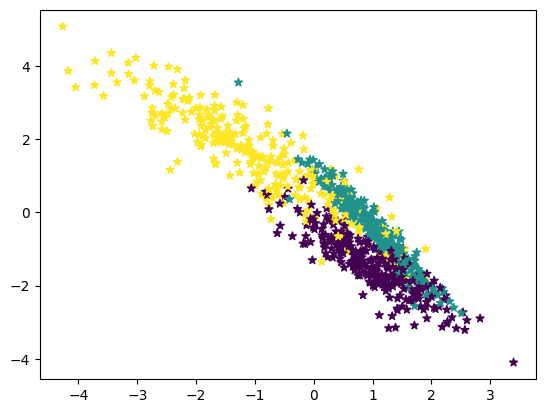

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


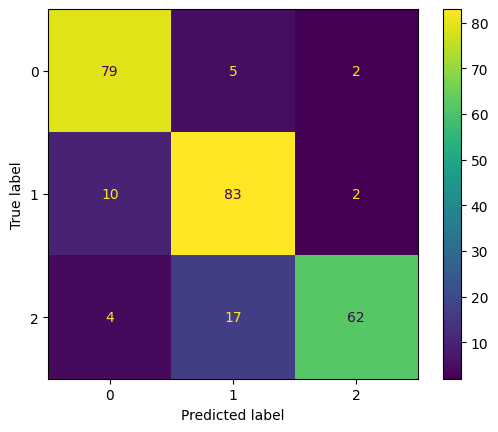

In [ ]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Vectorial

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
diabetes = datasets.load_diabetes()

In [ ]:
# print the names of the 13 features
print("Features: ", diabetes.feature_names)

# print data(feature)shape
diabetes.data.shape

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


(442, 10)

In [ ]:
# print the diabetes data features (top 5 records)
print(diabetes.data[0:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


In [ ]:
# print the diabetes labels ()
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.007518796992481203


Decision Tree Classification

In [73]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# load dataset
pima = pd.read_csv("/content/Archivo/diabetes (1).csv",  header=None, names=col_names)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0


In [78]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [78]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [80]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [81]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7651515151515151


# Tarea 3: Clasificación

Con los datos que seleccionaron al inicio de la clase, seleccionar uno de los modelos de clasificación y utilizarlo para sus datos. Parte de la calificacion de la tarea incluye:

- Utilizar uno de los modelos vistos en clase.
- Utilizar las metricas de evaluación mencionadas.
- Intrepretacion de las metrias de evaluación.
- Basandose en las características del algoritmo que eligieron, hacer conclusiones acerca de los resultados.